## 4 Gradient Descent Algorithm with Linear Regression


This is to demosntrate that we could use the gradient descent algorithm to do some work in linear regression

Again here we are using the Pima Diabete dataset, and I would like to see the relationship between the blood pressure and glucose. The very basic question is, would an increase in the blood pressure associated with a higher blood glucose? This would be a question that fits to be answered by linear regression. And we are gonna use gradient descent to carry out linear regression.

1. Import the Pima Diabete Data

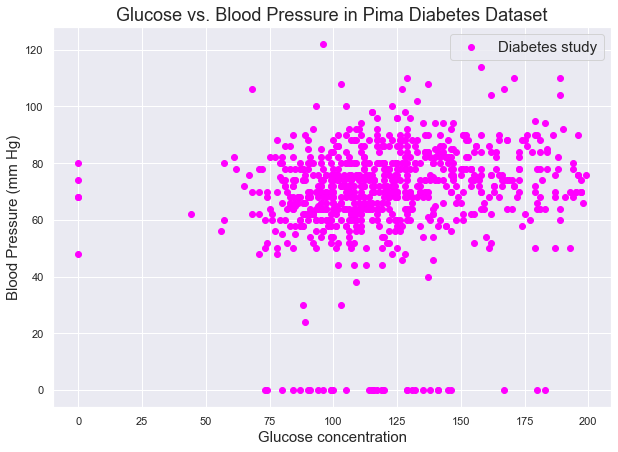

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

# Load the Pima Diabetes dataset
df = pd.read_csv("Datasets/diabetes.csv")

# Visualizing the relationship between 'Glucose' and 'Blood Pressure'
plt.figure(figsize=(10, 7))
plt.scatter(df['Glucose'], 
            df['BloodPressure'], 
            color="magenta",  # Using magenta color
            label="Diabetes study")
plt.xlabel("Glucose concentration", fontsize=15)
plt.ylabel("Blood Pressure (mm Hg)", fontsize=15)
plt.legend(fontsize=15)
plt.title("Glucose vs. Blood Pressure in Pima Diabetes Dataset", fontsize=18)
plt.show()


Here is the single neuron that we use to make the prediction

In [17]:
class SingleNeuron(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function
        self.w_ = None
        self.errors_ = []

    def train(self, X, y, alpha=0.005, epochs=50):
        # Add a column of ones to X to account for the bias term (bias trick)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w_ = np.random.rand(X_bias.shape[1])  # Initialize weights including bias
        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X_bias, y):  # Ensure X_bias is used here
                output = self.predict(xi)  # xi already includes the bias
                error = output - target
                self.w_ -= alpha * error * xi
                errors += 0.5 * (error ** 2)
            self.errors_.append(errors / len(X_bias))
        return self

    def predict(self, X):
        # Ensure that the input X is ready for multiplication with weights
        if X.ndim == 1:
            # If X is a single sample, make sure it is the correct length
            X = np.insert(X, 0, 1) if len(X) == self.w_.size - 1 else X
        elif X.ndim == 2 and X.shape[1] == self.w_.size - 1:
            # If X is a matrix of samples without the bias, add it
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.activation_function(np.dot(X, self.w_))

Then we need to modify our data

In [18]:
# Assuming 'df' is your DataFrame containing the Pima Diabetes dataset
X = df['Glucose'].values.reshape(-1, 1)
y = df['BloodPressure'].values

# Optional: Display the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (768, 1)
Shape of y: (768,)


Defining the activation function and then start training:

In [21]:
def linear_activation(z):
    return z

# Create a neuron with a linear activation function
node = SingleNeuron(linear_activation)

# Train the model
node.train(X, y, alpha=0.0001, epochs=1000)

# Print the training errors to evaluate
print("Training errors over epochs:", node.errors_)

Training errors over epochs: [4257.289589748057, 4239.217282555847, 4222.158292794297, 4205.2213963824715, 4188.405659098298, 4171.710154162647, 4155.133962178647, 4138.676171071559, 4122.335876029162, 4106.112179442544, 4090.0041908474777, 4074.011026866207, 4058.131811149795, 4042.365674320823, 4026.7117539167034, 4011.169194333346, 3995.7371467693506, 3980.414769170664, 3965.2012261756136, 3950.0956890605307, 3935.097335685658, 3920.2053504416785, 3905.418924196499, 3890.737254242669, 3876.1595442450157, 3861.6850041889634, 3847.31285032899, 3833.0423051377966, 3818.872597255642, 3804.802961440322, 3790.8326385173405, 3776.960875330688, 3763.18692469387, 3749.510045341453, 3735.9295018809444, 3722.4445647450743, 3709.0545101445045, 3695.758620020888, 3682.5561820003145, 3669.4464893472195, 3656.4288409185297, 3643.5025411183146, 3630.666899852735, 3617.9212324854284, 3605.2648597931625, 3592.697107921957, 3580.2173083435046, 3567.824797811982, 3555.5189183212, 3543.29901706208, 3531

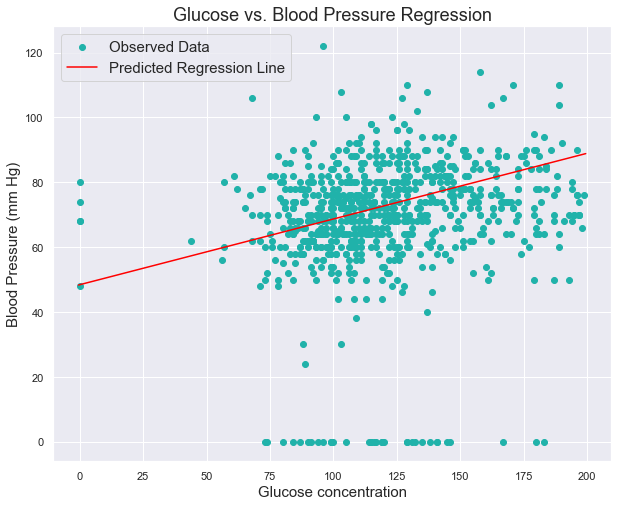

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Create a domain of glucose values for prediction
domain = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color="lightseagreen", label="Observed Data")
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color="red", label="Predicted Regression Line")
plt.xlabel("Glucose concentration", fontsize=15)
plt.ylabel("Blood Pressure (mm Hg)", fontsize=15)
plt.title("Glucose vs. Blood Pressure Regression", fontsize=18)
plt.legend(fontsize=15)
plt.show()


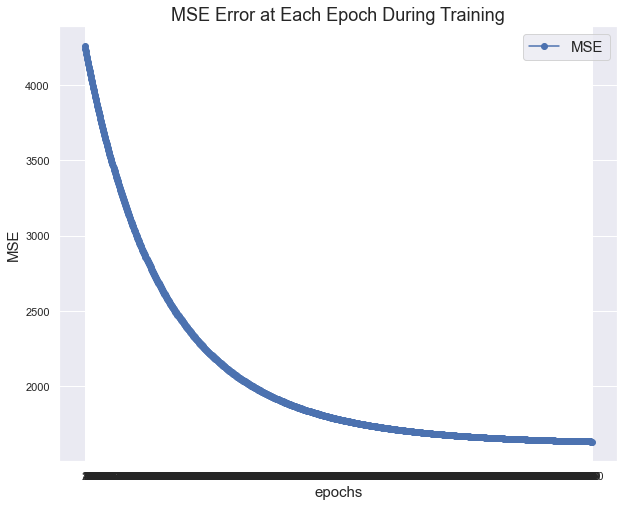

In [23]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

And plot the errors

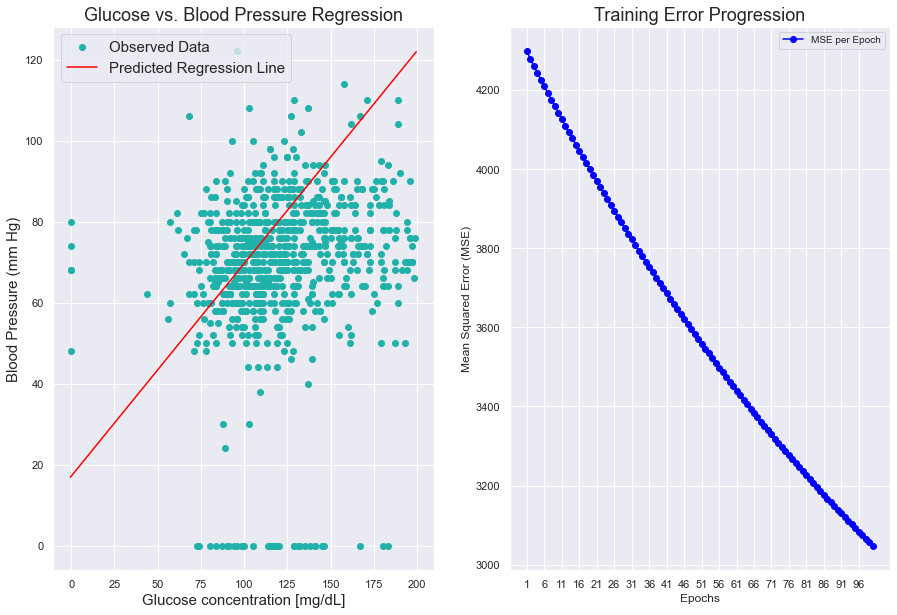

In [26]:
import matplotlib.pyplot as plt

# Assume node has already been defined and trained
node = SingleNeuron(linear_activation)
node.train(X, y, alpha=0.0001, epochs=100)

# Creating a domain for glucose values to be used in predictions
domain = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)

# Setting up a subplot with 2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Plotting the relationship between Glucose and Blood Pressure
ax1.scatter(X, y, color="lightseagreen", label="Observed Data")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)), color="red", label="Predicted Regression Line")
ax1.set_xlabel("Glucose concentration [mg/dL]", fontsize=15)
ax1.set_ylabel("Blood Pressure (mm Hg)", fontsize=15)
ax1.set_title("Glucose vs. Blood Pressure Regression", fontsize=18)
ax1.legend(fontsize=15)

# Plotting the Mean Squared Error over each epoch
ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker="o",
         linestyle="-",
         color="blue",
         label="MSE per Epoch")
ax2.set_xlabel("Epochs", fontsize=12)
ax2.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))  # Setting x-axis ticks
ax2.legend(fontsize=10)
ax2.set_title("Training Error Progression", fontsize=18)

plt.show()
